In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np
from tqdm.notebook import tqdm_notebook
base_path = '../data'

100836
60894136
30396650
13157672
181


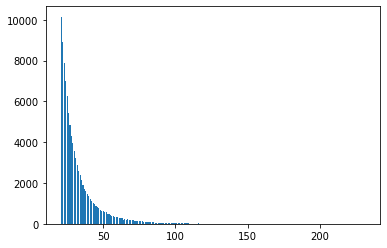

In [4]:
ratings = pd.read_csv(f'{base_path}/ratings_movielens.csv')

u_e = ratings[['userId', 'movieId']]
print(len(u_e))
pairs = pd.merge(u_e, u_e, on='userId', how='outer')
print(len(pairs))
pairs = pairs[pairs.movieId_x < pairs.movieId_y]
print(len(pairs))
pairs = pairs.groupby(['movieId_x', 'movieId_y']).size().reset_index().rename(columns={0:'n_co-rated'})
print(len(pairs))
pairs = pairs[['n_co-rated']].groupby(['n_co-rated']).size().reset_index().rename(columns={0:'t'})
print(len(pairs))
pairs = pairs[20:]
plt.bar(pairs['n_co-rated'], pairs['t'])
plt.show()


100836
2911932
    userId_x  movieId  userId_y
1          1        1         5
2          1        1         7
3          1        1        15
4          1        1        17
5          1        1        18
6          1        1        19
7          1        1        21
8          1        1        27
9          1        1        31
10         1        1        32
         userId_x  movieId  userId_y
420951          1      333         2
2051117         1     3578         2
164054
   userId_x  userId_y  n_co-rated
0         1         2           2
1         1         3           7
2         1         4          45
3         1         5          13
4         1         6          33
5         1         7          26
6         1         8          15
7         1         9           5
8         1        10           6
9         1        11          16
490
   n_co-rated      t
0           1  18010
1           2  14895
2           3  12373
3           4  10574
4           5   9027
5          

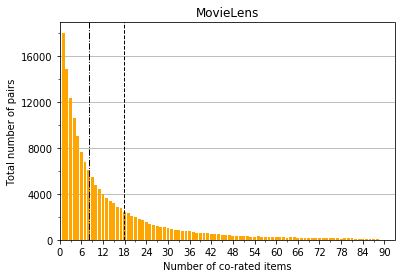

In [5]:
ratings = pd.read_csv(f'{base_path}/ratings_movielens.csv')

movie_column = 'movieId'

u_e = ratings[['userId', movie_column]]
print(len(u_e))

pairs = pd.merge(u_e, u_e, on=movie_column, how='outer')
pairs = pairs[pairs.userId_x < pairs.userId_y]
print(len(pairs))
print(pairs[:10])
print(pairs[(pairs['userId_x'] == 1) & (pairs['userId_y'] == 2)])
pairs = pairs.groupby(['userId_x', 'userId_y']).size().reset_index().rename(columns={0:'n_co-rated'})
p_average = pairs['n_co-rated'].mean()
p_median = pairs['n_co-rated'].median()
print(len(pairs))

print(pairs[:10])
pairs = pairs[['n_co-rated']].groupby(['n_co-rated']).size().reset_index().rename(columns={0:'t'})
print(len(pairs))
print(pairs[:10])
pairs =pairs[:88]
fig, axes = plt.subplots(nrows=1)
axes.grid(True, 'major', 'y')

axes.xaxis.set_major_locator(MultipleLocator(6))
axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.xaxis.set_minor_locator(MultipleLocator(3))


axes.yaxis.set_major_locator(MultipleLocator(4000))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.yaxis.set_minor_locator(MultipleLocator(2000))

axes.set_xlabel('Number of co-rated items')
axes.set_ylabel('Total number of pairs')
axes.set_axisbelow(True)

plt.bar(pairs['n_co-rated'], pairs['t'], color='orange')
plt.axvline(p_average, color='k', linestyle='dashed', linewidth=1)
plt.axvline(p_median, color='k', linestyle='dashdot', linewidth=1)
axes.set_xlim([0, None])
plt.title('MovieLens' if movie_column == 'movieId' else 'MindReader')

plt.savefig('co-occurance-user.pdf', bbox_inches='tight')

plt.show()


29515
590557
280521
Empty DataFrame
Columns: [userId, uri_x, uri_y]
Index: []
148205


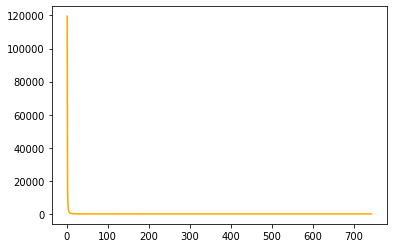

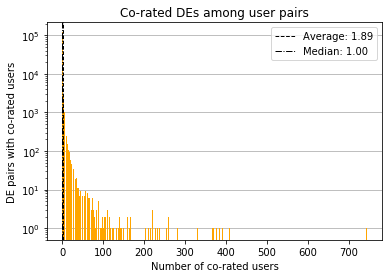

In [10]:
mode = 'DE'

ratings = pd.read_csv(f'/home/anders/Downloads/ratings-ppr.csv')
ratings = ratings[ratings.sentiment != 0]
ratings = ratings[ratings.isItem] if mode == 'RE' else ratings[~ratings.isItem]

movie_column = 'uri'
groupon = movie_column

u_e = ratings[['userId', movie_column]]
print(len(u_e))

pairs = pd.merge(u_e, u_e, on=('userId' if groupon == movie_column else movie_column), how='outer')
del u_e
print(len(pairs))
pairs = pairs[pairs[f'{groupon}_x'] < pairs[f'{groupon}_y']]
print(len(pairs))
print(pairs[(pairs[f'{groupon}_x'] == 1) & (pairs[f'{groupon}_y'] == 2)])
pairs = pairs.groupby([f'{groupon}_x', f'{groupon}_y']).size().reset_index().rename(columns={0:'n_co-rated'})
p_average = pairs['n_co-rated'].mean()
p_median = pairs['n_co-rated'].median()
print(len(pairs))

pairs = pairs[['n_co-rated']].groupby(['n_co-rated']).size().reset_index().rename(columns={0:'t'})
#pairs =pairs[:88]

plt.plot(pairs['n_co-rated'], pairs['t'], color='orange')
plt.show()
fig, axes = plt.subplots(nrows=1)
axes.grid(True, 'major', 'y')

axes.set_yscale('log')
#axes.set_xscale('log')

axes.set_xlabel(f'Number of co-rated {mode}s' if groupon != movie_column else 'Number of co-rated users')
axes.set_ylabel(f'User pairs with co-rated {mode}s' if groupon != movie_column else f'{mode} pairs with co-rated users')
axes.set_axisbelow(True)

plt.bar(pairs['n_co-rated'], pairs['t'], color='orange')
# plt.plot(pairs['n_co-rated'], pairs['t'], color='blue')

plt.axvline(p_average, color='k', linestyle='dashed', linewidth=1, label=f'Average: {p_average:.2f}')
plt.axvline(p_median, color='k', linestyle='dashdot', linewidth=1, label=f'Median: {p_median:.2f}')

#axes.set_xlim([0.5, 80])
plt.title('MovieLens' if movie_column == 'movieId' else f'Co-rated {mode}s among user pairs')
plt.legend()

fig_name = f"co-occurrence-{'user' if groupon == movie_column else 'movie'}-{mode}.pdf"
plt.savefig(fig_name, bbox_inches='tight')

plt.show()
